In [1]:
import chess
from bot import ChessBot
import numpy as np
from pystockfish import Engine
from IPython.display import clear_output
from IPython.core.display import display

board = chess.Board()
gruefish = ChessBot()

Using TensorFlow backend.


In [2]:
gruefish_black = ChessBot()
gruefish_black.explore = 0.5
gruefish_black.init_explore = 0.6

In [2]:
shitfish = Engine(depth=10, param={"Threads": 1, "Hash": 10})
shitfish.newgame()

In [2]:
stockfish = Engine(depth=20, param={"Threads": 12})
stockfish.newgame()

In [3]:
if board.is_game_over():
    print(board.result())
else:
    if board.turn == chess.WHITE:
        move = gruefish.best_move(board.fen(), time_limit=30, depth=6, debug=False)
        print(move)
        board.push_uci(move['move'])
    else:
        shitfish.setfenposition(board.fen())
        board.push_uci(shitfish.bestmove()['move'])

board

AttributeError: 'str' object has no attribute 'copy'

In [4]:
fen = board.fen()
print(fen)
fen = '8/8/6p1/8/p1R3Pn/1p2K3/8/3k4 w - - 18 80'
board = chess.Board(fen=fen)

8/8/6p1/8/p1R3Pn/1p2K3/8/3k4 w - - 18 80


In [8]:
board.reset()

In [9]:
gruefish.clear_cache()

total simulations: 209 depth: 7
[{'visit_count': 61, 'mcts_score': 0.56655232060646887, 'total_score': 34.559691556994601, 'score': 0.18957371, 'move': 'g1f3'}, {'visit_count': 39, 'mcts_score': 0.54350252326218584, 'total_score': 21.196598407225249, 'score': 0.018157164, 'move': 'd2d4'}, {'visit_count': 37, 'mcts_score': 0.54029128897563616, 'total_score': 19.990777692098536, 'score': 0.19309822, 'move': 'c2c4'}]


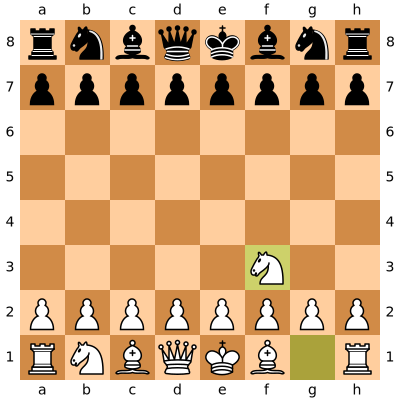

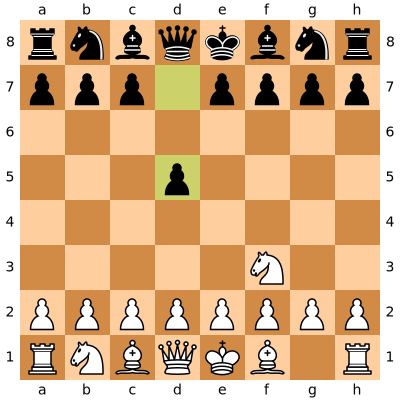

total simulations: 252 depth: 7
[{'visit_count': 99, 'mcts_score': 0.5832446833715349, 'total_score': 57.741223653781958, 'score': 0.14977901, 'move': 'd2d4'}, {'visit_count': 66, 'mcts_score': 0.56669429735813936, 'total_score': 37.401823625637199, 'score': 0.60992831, 'move': 'c2c4'}, {'visit_count': 25, 'mcts_score': 0.51122996088574768, 'total_score': 12.780749022143693, 'score': 0.15388055, 'move': 'g2g3'}]


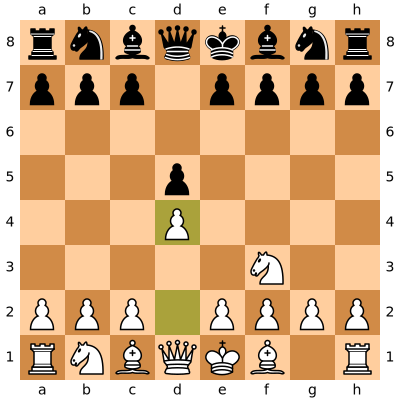

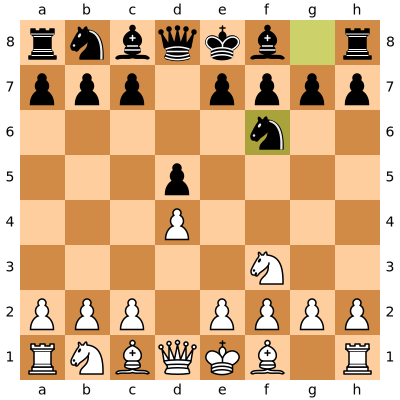

total simulations: 251 depth: 7
[{'visit_count': 141, 'mcts_score': 0.58745667774639754, 'total_score': 82.831391562242047, 'score': 0.85555929, 'move': 'c2c4'}, {'visit_count': 31, 'mcts_score': 0.51871539262558697, 'total_score': 16.080177171393196, 'score': 0.0064148684, 'move': 'g2g3'}, {'visit_count': 23, 'mcts_score': 0.498242156139026, 'total_score': 11.459569591197598, 'score': 0.059715785, 'move': 'c1f4'}]


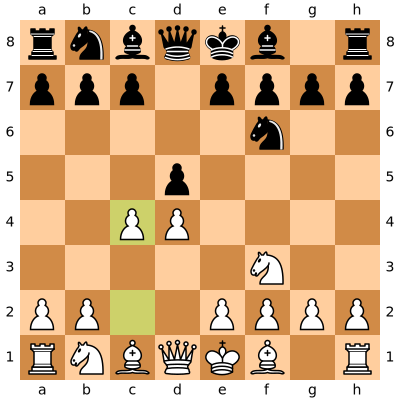

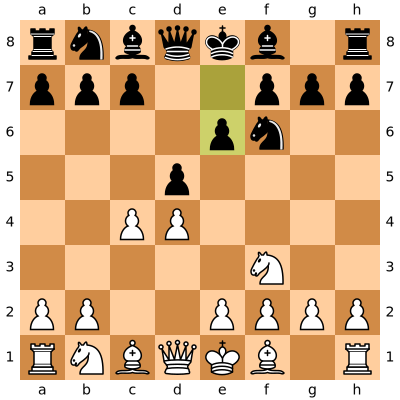

total simulations: 284 depth: 7
[{'visit_count': 89, 'mcts_score': 0.57194242711892163, 'total_score': 50.90287601358402, 'score': 0.87353271, 'move': 'b1c3'}, {'visit_count': 60, 'mcts_score': 0.5553219407422636, 'total_score': 33.319316444535815, 'score': 0.022598905, 'move': 'g2g3'}, {'visit_count': 47, 'mcts_score': 0.5436440740700994, 'total_score': 25.551271481294673, 'score': 0.0056646438, 'move': 'c4d5'}]


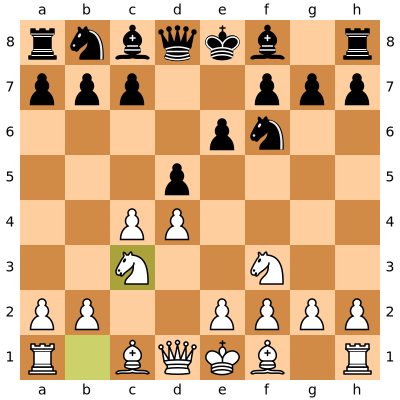

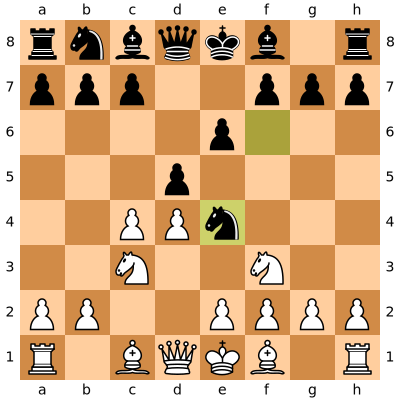

total simulations: 206 depth: 7
[{'visit_count': 16, 'mcts_score': 0.69113167353138305, 'total_score': 11.058106776502129, 'score': 0.0023178195, 'move': 'd1b3'}, {'visit_count': 12, 'mcts_score': 0.66899697579440798, 'total_score': 8.0279637095328962, 'score': 0.0022799014, 'move': 'f3e5'}, {'visit_count': 34, 'mcts_score': 0.64744487964652786, 'total_score': 22.013125907981948, 'score': 0.41901466, 'move': 'e2e3'}]


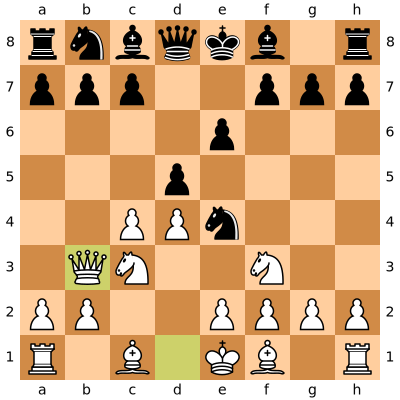

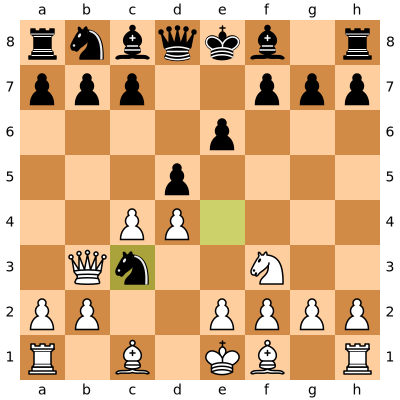

total simulations: 224 depth: 7
[{'visit_count': 210, 'mcts_score': 0.62758287835014037, 'total_score': 131.79240445352949, 'score': 0.57555181, 'move': 'b2c3'}, {'visit_count': 9, 'mcts_score': 0.43700050520114891, 'total_score': 3.9330045468103401, 'score': 0.41285789, 'move': 'b3c3'}, {'visit_count': 5, 'mcts_score': 0.34175119655530184, 'total_score': 1.7087559827765091, 'score': 0.0045250384, 'move': 'e2e3'}]


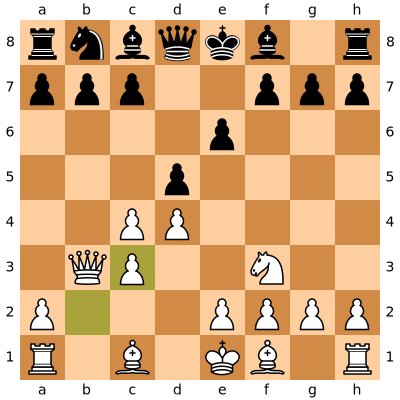

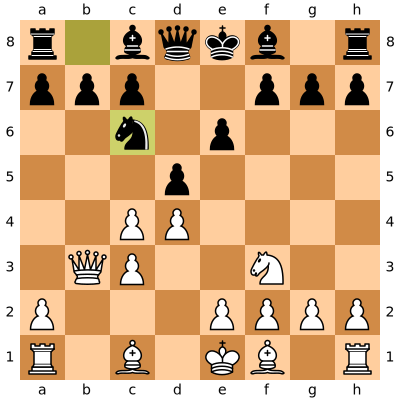

total simulations: 268 depth: 7
[{'visit_count': 56, 'mcts_score': 0.62234790633582937, 'total_score': 34.851482754806447, 'score': 0.052910447, 'move': 'a1b1'}, {'visit_count': 52, 'mcts_score': 0.61809776059126498, 'total_score': 32.141083550745776, 'score': 0.64107209, 'move': 'c4d5'}, {'visit_count': 35, 'mcts_score': 0.59567403493488447, 'total_score': 20.848591222720955, 'score': 0.11691371, 'move': 'e2e3'}]


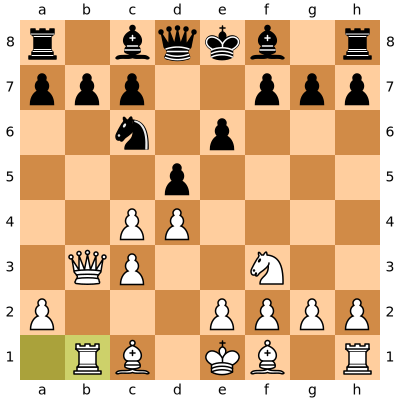

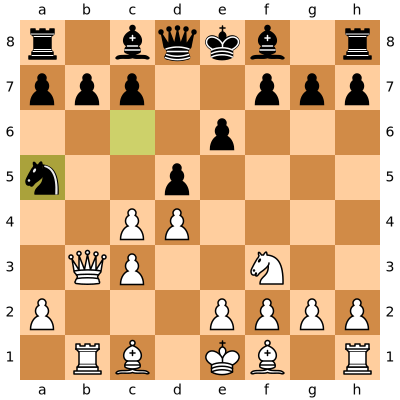

total simulations: 236 depth: 7
[{'visit_count': 148, 'mcts_score': 0.66429813959833639, 'total_score': 98.316124660553783, 'score': 0.70676231, 'move': 'b3a4'}, {'visit_count': 66, 'mcts_score': 0.63551970509823386, 'total_score': 41.944300536483432, 'score': 0.069449596, 'move': 'b3c2'}, {'visit_count': 11, 'mcts_score': 0.50794131146131449, 'total_score': 5.5873544260744596, 'score': 0.012247995, 'move': 'b3d1'}]


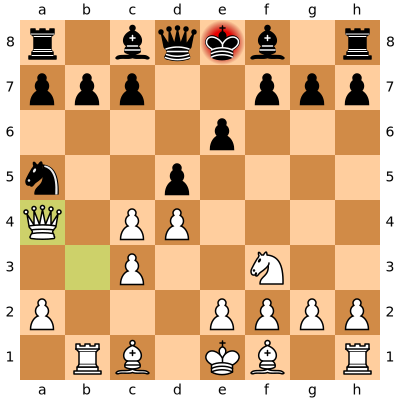

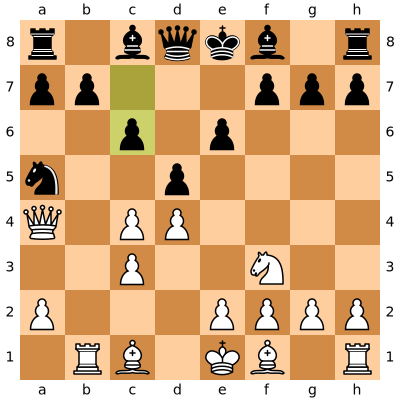

total simulations: 359 depth: 7
[{'visit_count': 209, 'mcts_score': 0.65372846612923019, 'total_score': 136.62924942100912, 'score': 0.3792741, 'move': 'c4c5'}, {'visit_count': 61, 'mcts_score': 0.61094379830706613, 'total_score': 37.267571696731032, 'score': 0.030759152, 'move': 'e2e4'}, {'visit_count': 22, 'mcts_score': 0.54568885215954777, 'total_score': 12.005154747510051, 'score': 0.12066066, 'move': 'e2e3'}]


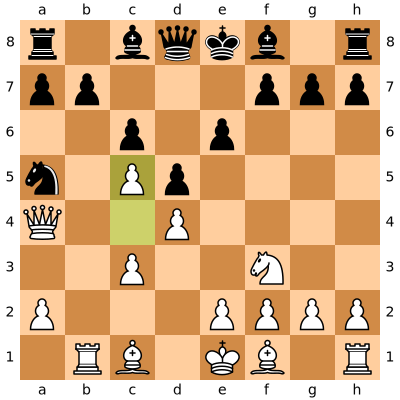

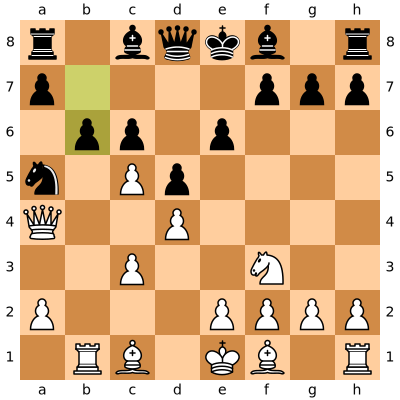

total simulations: 201 depth: 7
[{'visit_count': 53, 'mcts_score': 0.76718838684390556, 'total_score': 40.660984502726997, 'score': 0.069019593, 'move': 'e2e4'}, {'visit_count': 37, 'mcts_score': 0.74802065807065943, 'total_score': 27.676764348614398, 'score': 0.19552839, 'move': 'e2e3'}, {'visit_count': 31, 'mcts_score': 0.73426694795133807, 'total_score': 22.762275386491481, 'score': 0.39298832, 'move': 'f3e5'}]


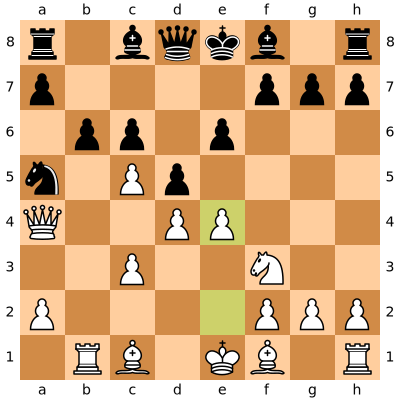

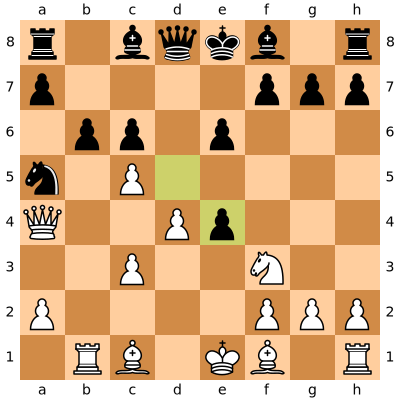

total simulations: 222 depth: 7
[{'visit_count': 186, 'mcts_score': 0.72927953483113961, 'total_score': 135.64599347859198, 'score': 0.91434216, 'move': 'f3e5'}, {'visit_count': 14, 'mcts_score': 0.58774684612836225, 'total_score': 8.2284558457970718, 'score': 0.034962881, 'move': 'f3g5'}, {'visit_count': 11, 'mcts_score': 0.56419129066324658, 'total_score': 6.2061041972957121, 'score': 0.034944415, 'move': 'f3d2'}]


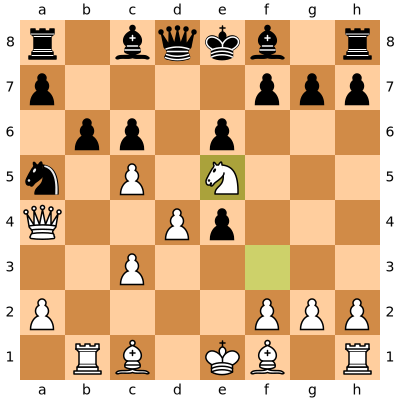

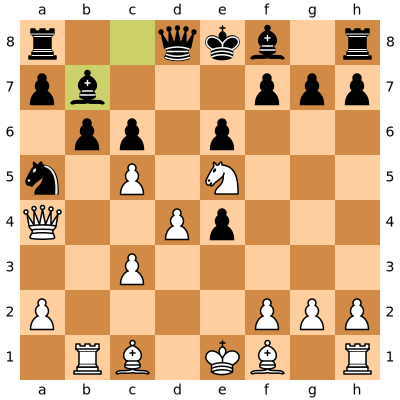

total simulations: 192 depth: 7
[{'visit_count': 42, 'mcts_score': 0.77025406462015178, 'total_score': 32.350670714046373, 'score': 0.13751844, 'move': 'f1e2'}, {'visit_count': 17, 'mcts_score': 0.70788495182794797, 'total_score': 12.034044181075116, 'score': 0.0045502842, 'move': 'a4c2'}, {'visit_count': 13, 'mcts_score': 0.68617812454736737, 'total_score': 8.920315619115776, 'score': 0.0085177999, 'move': 'h2h4'}]


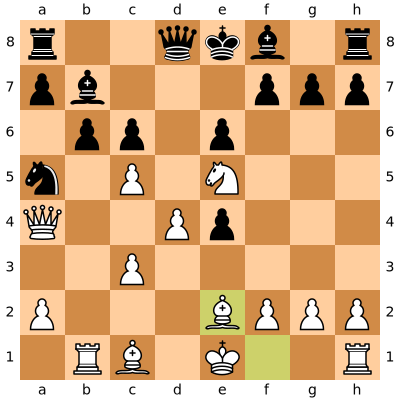

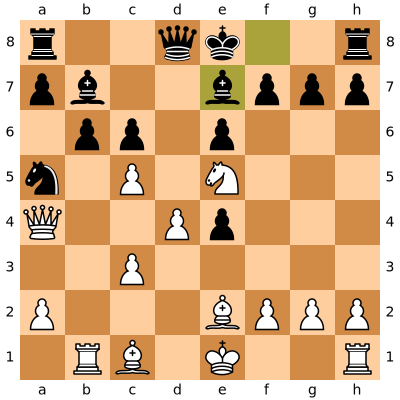

total simulations: 205 depth: 7
[{'visit_count': 23, 'mcts_score': 0.76483570193396577, 'total_score': 17.591221144481214, 'score': 0.0023091557, 'move': 'a4c2'}, {'visit_count': 44, 'mcts_score': 0.75485312005947813, 'total_score': 33.21353728261704, 'score': 0.068862267, 'move': 'c1f4'}, {'visit_count': 23, 'mcts_score': 0.71501526182863151, 'total_score': 16.445351022058524, 'score': 0.031374596, 'move': 'f2f3'}]


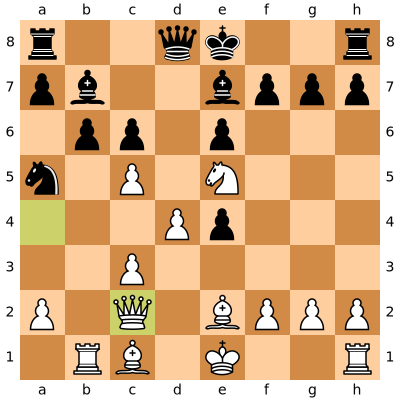

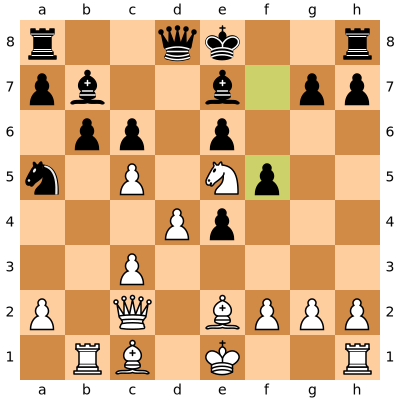

total simulations: 193 depth: 7
[{'visit_count': 29, 'mcts_score': 0.7850613826617272, 'total_score': 22.76678009719009, 'score': 0.026984639, 'move': 'f2f3'}, {'visit_count': 28, 'mcts_score': 0.782067416750302, 'total_score': 21.897887669008455, 'score': 0.53141129, 'move': 'e1g1'}, {'visit_count': 25, 'mcts_score': 0.7749031990752786, 'total_score': 19.372579976881966, 'score': 0.17528197, 'move': 'e2h5'}]
best move:
{'visit_count': 28, 'mcts_score': 0.782067416750302, 'total_score': 21.897887669008455, 'score': 0.53141129, 'move': 'e1g1'}


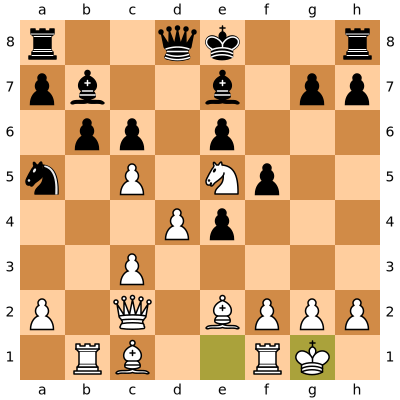

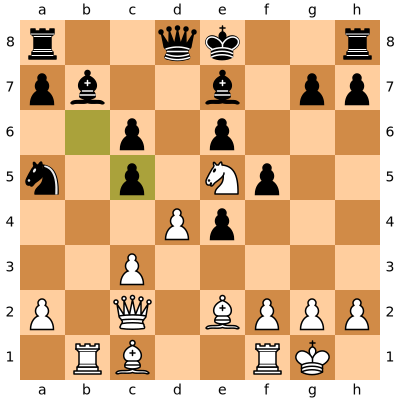

total simulations: 182 depth: 7
[{'visit_count': 35, 'mcts_score': 0.79840757346023072, 'total_score': 27.944265071108074, 'score': 0.20012884, 'move': 'd4c5'}, {'visit_count': 20, 'mcts_score': 0.76174906648413343, 'total_score': 15.234981329682668, 'score': 0.0085850498, 'move': 'c1f4'}, {'visit_count': 20, 'mcts_score': 0.76116399915857591, 'total_score': 15.223279983171519, 'score': 0.012041595, 'move': 'f2f3'}]


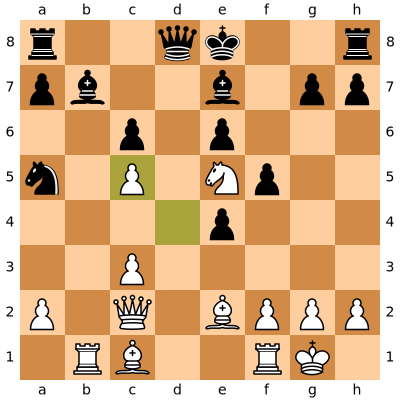

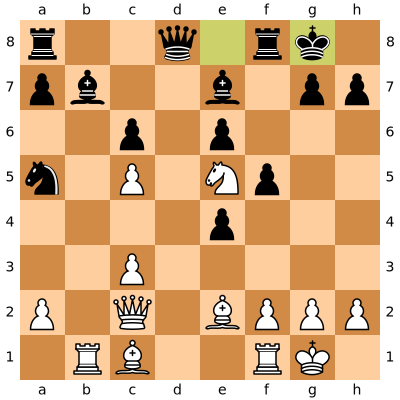

total simulations: 209 depth: 7
[{'visit_count': 118, 'mcts_score': 0.80443377187094434, 'total_score': 94.923185080771432, 'score': 0.45228377, 'move': 'f1d1'}, {'visit_count': 35, 'mcts_score': 0.75129871434270634, 'total_score': 26.295455001994721, 'score': 0.076716512, 'move': 'c1f4'}, {'visit_count': 10, 'mcts_score': 0.64872628051815329, 'total_score': 6.4872628051815333, 'score': 0.13607997, 'move': 'c2a4'}]


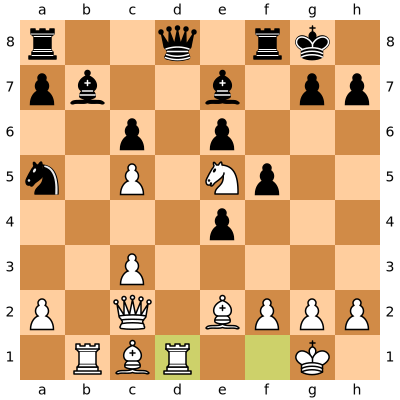

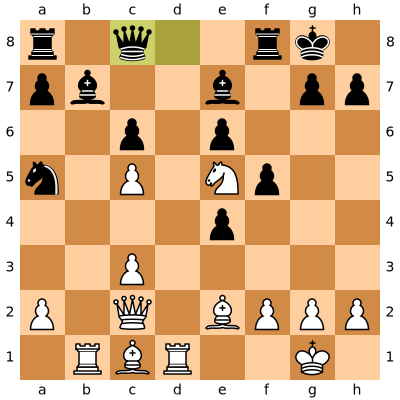

total simulations: 222 depth: 7
[{'visit_count': 63, 'mcts_score': 0.80643847343440034, 'total_score': 50.805623826367224, 'score': 0.094603725, 'move': 'c1f4'}, {'visit_count': 36, 'mcts_score': 0.77858977131367046, 'total_score': 28.029231767292138, 'score': 0.11627694, 'move': 'c2a4'}, {'visit_count': 22, 'mcts_score': 0.74540962472308303, 'total_score': 16.399011743907828, 'score': 0.32066417, 'move': 'c1e3'}]


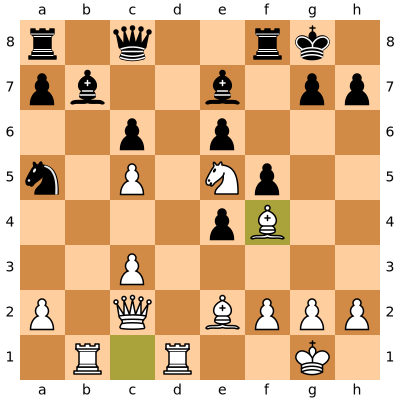

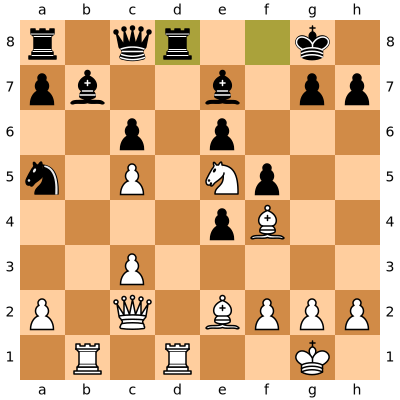

total simulations: 168 depth: 7
[{'visit_count': 41, 'mcts_score': 0.84060703355637856, 'total_score': 34.464888375811519, 'score': 0.048743073, 'move': 'd1d8'}, {'visit_count': 18, 'mcts_score': 0.78355048394166471, 'total_score': 14.103908710949964, 'score': 0.69924015, 'move': 'c2a4'}, {'visit_count': 17, 'mcts_score': 0.77958145432978598, 'total_score': 13.252884723606362, 'score': 0.0033697379, 'move': 'h2h3'}]


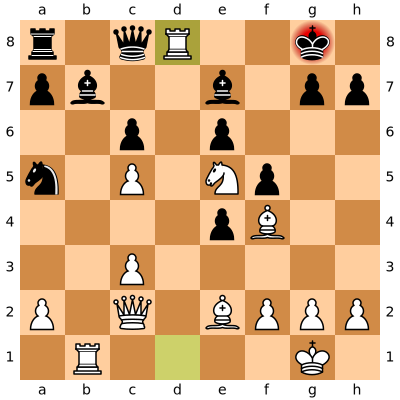

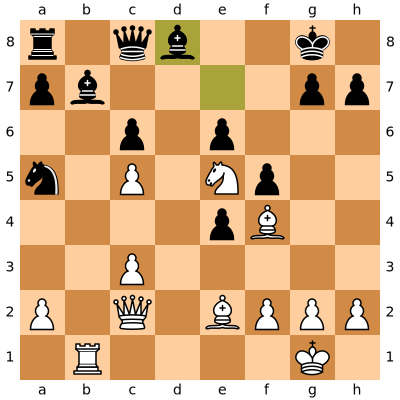

total simulations: 223 depth: 7
[{'visit_count': 24, 'mcts_score': 0.82590254498453108, 'total_score': 19.821661079628747, 'score': 0.015846835, 'move': 'e5c4'}, {'visit_count': 19, 'mcts_score': 0.8077423042434968, 'total_score': 15.347103780626439, 'score': 0.0033402096, 'move': 'h2h3'}, {'visit_count': 19, 'mcts_score': 0.80765825931975177, 'total_score': 15.345506927075284, 'score': 0.49116918, 'move': 'c2a4'}]


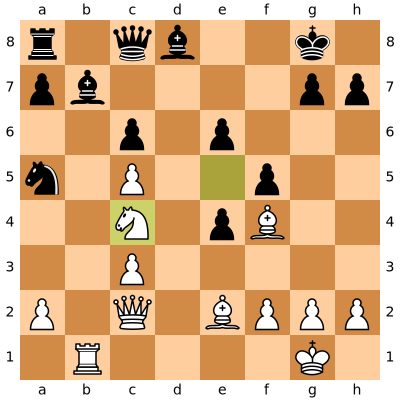

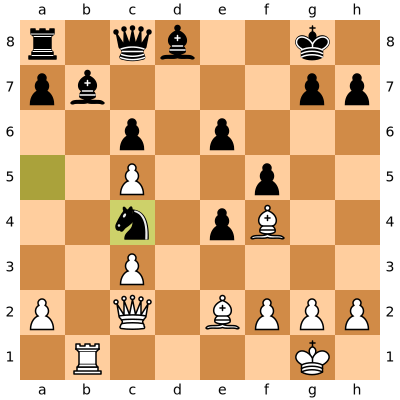

total simulations: 299 depth: 7
[{'visit_count': 272, 'mcts_score': 0.70708242688793077, 'total_score': 192.32642011351717, 'score': 0.93236446, 'move': 'e2c4'}, {'visit_count': 9, 'mcts_score': 0.48141593252119613, 'total_score': 4.332743392690765, 'score': 0.0044068368, 'move': 'c2a4'}, {'visit_count': 6, 'mcts_score': 0.4470021848543631, 'total_score': 2.6820131091261787, 'score': 0.037210874, 'move': 'c2b3'}]


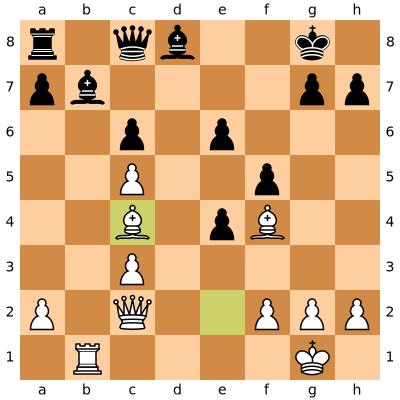

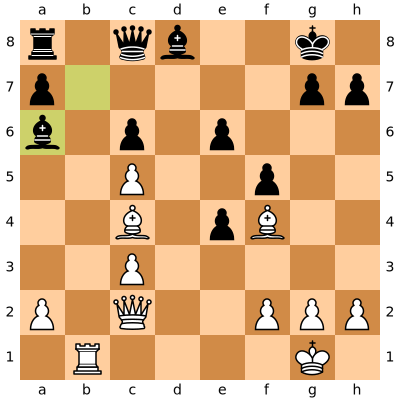

total simulations: 449 depth: 7
[{'visit_count': 344, 'mcts_score': 0.68426222943842208, 'total_score': 235.38620692681718, 'score': 0.10449478, 'move': 'c4a6'}, {'visit_count': 14, 'mcts_score': 0.52373237578010712, 'total_score': 7.3322532609214992, 'score': 0.51774991, 'move': 'c2b3'}, {'visit_count': 13, 'mcts_score': 0.51797996228944099, 'total_score': 6.7337395097627333, 'score': 0.09953329, 'move': 'c2a4'}]


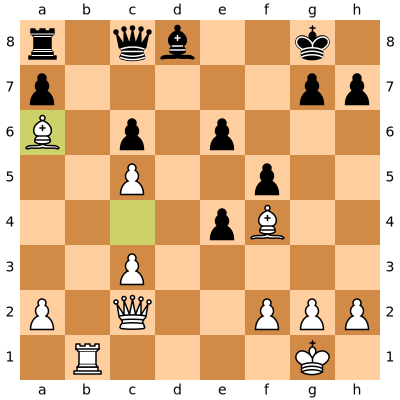

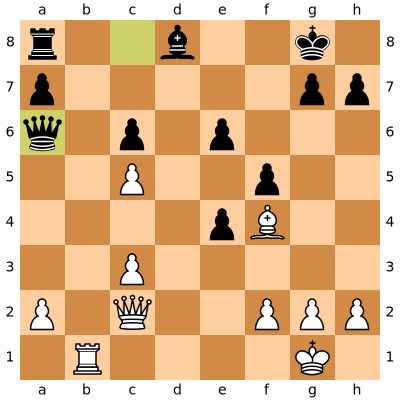

total simulations: 523 depth: 7
[{'visit_count': 371, 'mcts_score': 0.651646853311592, 'total_score': 241.76098257860062, 'score': 0.29439071, 'move': 'c2b3'}, {'visit_count': 16, 'mcts_score': 0.50058749847234962, 'total_score': 8.009399975557594, 'score': 0.0084803971, 'move': 'f4b8'}, {'visit_count': 12, 'mcts_score': 0.46663576909127819, 'total_score': 5.5996292290953384, 'score': 0.085194156, 'move': 'f4e5'}]


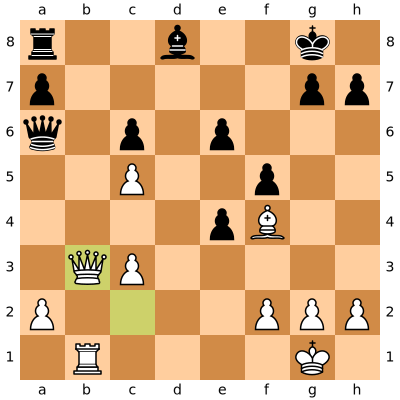

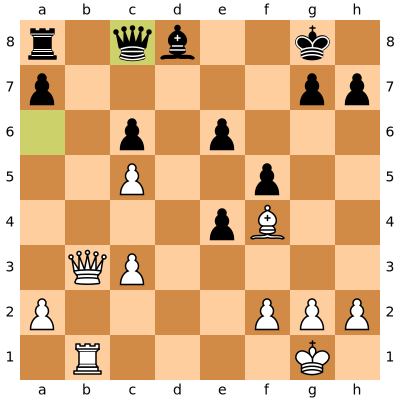

total simulations: 392 depth: 7
[{'visit_count': 54, 'mcts_score': 0.62190498502789782, 'total_score': 33.582869191506482, 'score': 0.032455385, 'move': 'b3d1'}, {'visit_count': 44, 'mcts_score': 0.60971805267554979, 'total_score': 26.827594317724191, 'score': 0.05090031, 'move': 'f4e5'}, {'visit_count': 34, 'mcts_score': 0.59483491094467977, 'total_score': 20.224386972119113, 'score': 0.16773947, 'move': 'b1d1'}]


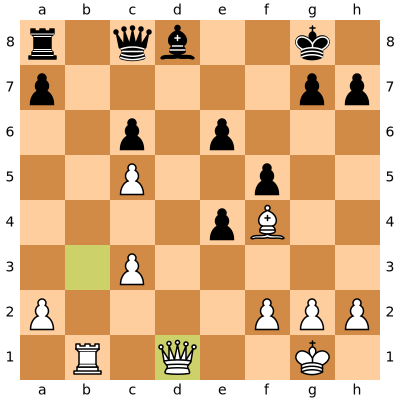

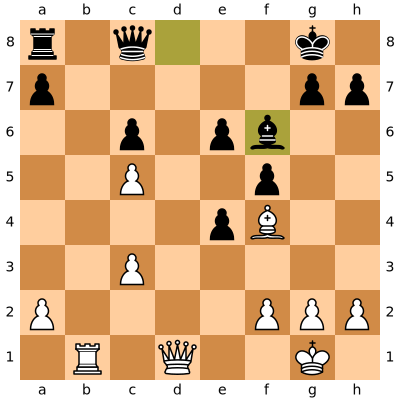

total simulations: 186 depth: 7
[{'visit_count': 42, 'mcts_score': 0.47933763008287322, 'total_score': 20.132180463480676, 'score': 0.16076751, 'move': 'd1b3'}, {'visit_count': 21, 'mcts_score': 0.43600108727348491, 'total_score': 9.156022832743183, 'score': 0.1376902, 'move': 'f4d6'}, {'visit_count': 21, 'mcts_score': 0.43318086407203971, 'total_score': 9.0967981455128335, 'score': 0.36841905, 'move': 'd1d6'}]


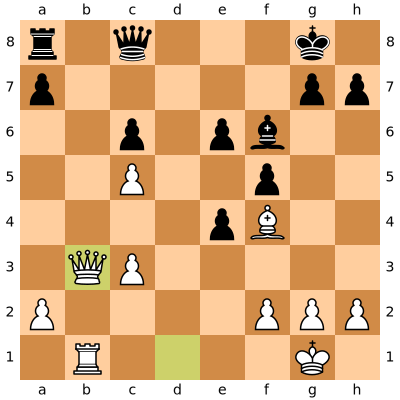

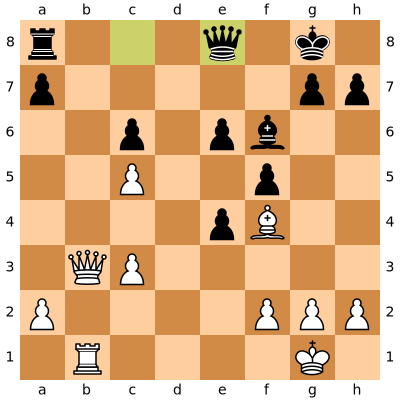

total simulations: 163 depth: 7
[{'visit_count': 32, 'mcts_score': 0.50518510587320686, 'total_score': 16.16592338794262, 'score': 0.025555534, 'move': 'f4c7'}, {'visit_count': 15, 'mcts_score': 0.44761199861518342, 'total_score': 6.714179979227751, 'score': 0.29885212, 'move': 'f4d6'}, {'visit_count': 14, 'mcts_score': 0.44531601765418705, 'total_score': 6.2344242471586186, 'score': 0.063915983, 'move': 'h2h3'}]


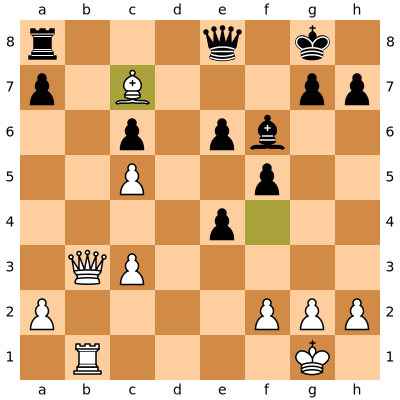

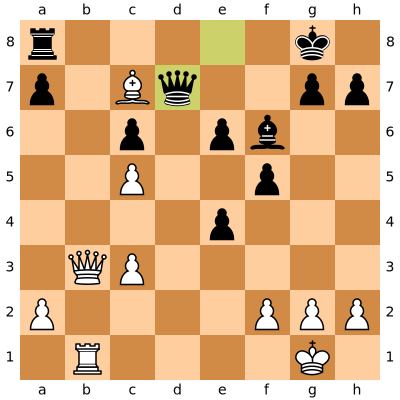

total simulations: 212 depth: 7
[{'visit_count': 131, 'mcts_score': 0.44926802819369727, 'total_score': 58.854111693374342, 'score': 0.34050384, 'move': 'c7d6'}, {'visit_count': 16, 'mcts_score': 0.32793264707845815, 'total_score': 5.2469223532553304, 'score': 0.029061396, 'move': 'c7f4'}, {'visit_count': 11, 'mcts_score': 0.29329660631849741, 'total_score': 3.2262626695034715, 'score': 0.066474885, 'move': 'c7a5'}]


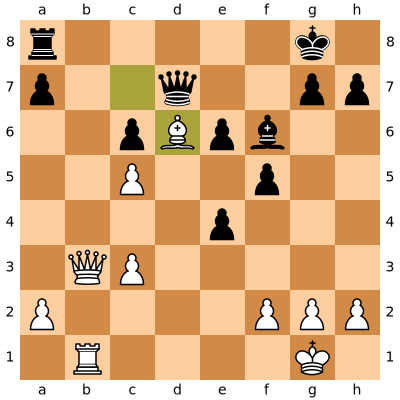

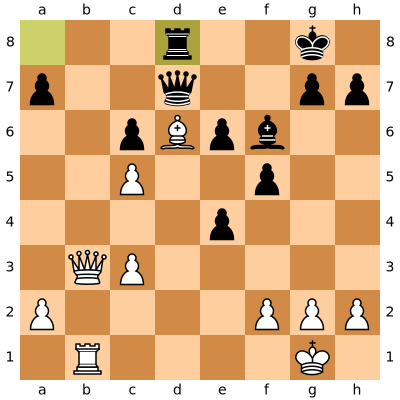

total simulations: 191 depth: 7
[{'visit_count': 27, 'mcts_score': 0.54710137619147037, 'total_score': 14.771737157169699, 'score': 0.029451769, 'move': 'b3a4'}, {'visit_count': 15, 'mcts_score': 0.49745821080450692, 'total_score': 7.4618731620676035, 'score': 0.081696019, 'move': 'b3c4'}, {'visit_count': 14, 'mcts_score': 0.49369119267589906, 'total_score': 6.9116766974625872, 'score': 0.030215221, 'move': 'g2g4'}]


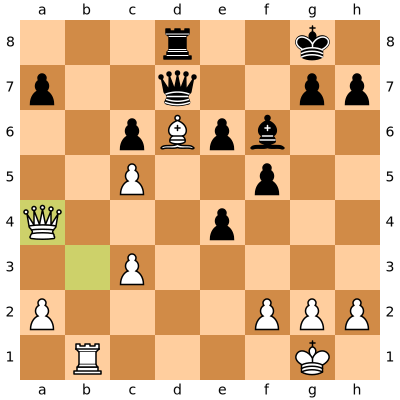

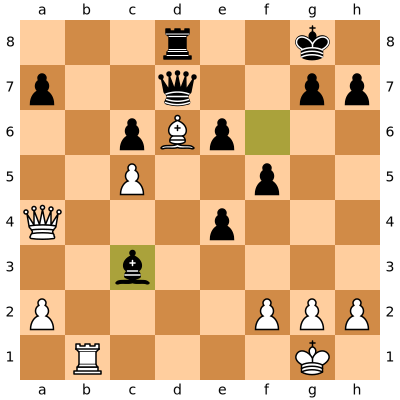

total simulations: 201 depth: 7
[{'visit_count': 49, 'mcts_score': 0.56652726386799501, 'total_score': 27.759835929531757, 'score': 0.25630188, 'move': 'a4a6'}, {'visit_count': 18, 'mcts_score': 0.49809855358313349, 'total_score': 8.9657739644964032, 'score': 0.086191148, 'move': 'a4c4'}, {'visit_count': 13, 'mcts_score': 0.46887596992723235, 'total_score': 6.0953876090540202, 'score': 0.0042714146, 'move': 'a2a3'}]


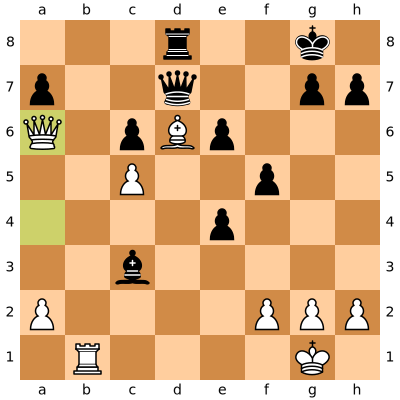

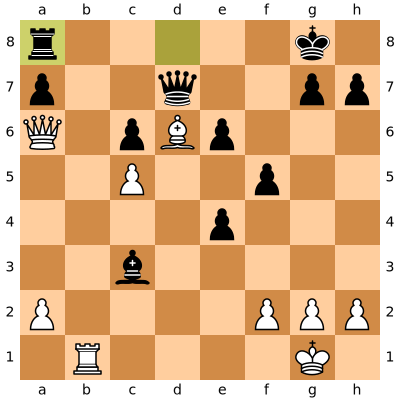

total simulations: 184 depth: 7
[{'visit_count': 19, 'mcts_score': 0.68975270438706138, 'total_score': 13.105301383354167, 'score': 0.0026795128, 'move': 'h2h4'}, {'visit_count': 29, 'mcts_score': 0.64099951388735921, 'total_score': 18.588985902733416, 'score': 0.032236855, 'move': 'h2h3'}, {'visit_count': 25, 'mcts_score': 0.6310684193437105, 'total_score': 15.776710483592762, 'score': 0.018180659, 'move': 'a6c4'}]


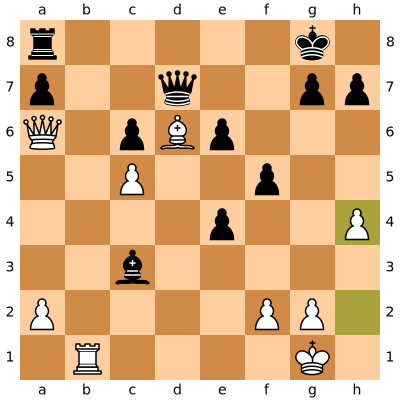

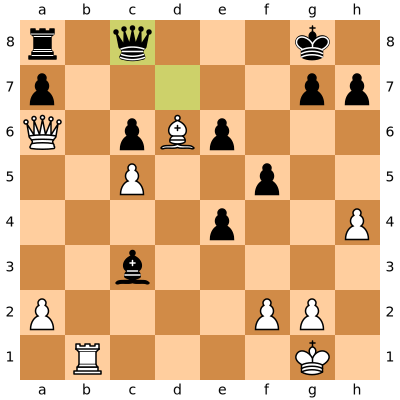

total simulations: 214 depth: 7
[{'visit_count': 94, 'mcts_score': 0.58086487944963383, 'total_score': 54.601298668265585, 'score': 0.030033203, 'move': 'a6a4'}, {'visit_count': 35, 'mcts_score': 0.53569271035571309, 'total_score': 18.749244862449959, 'score': 0.46253774, 'move': 'a6c4'}, {'visit_count': 26, 'mcts_score': 0.51683682737088865, 'total_score': 13.437757511643106, 'score': 0.031099061, 'move': 'a6e2'}]


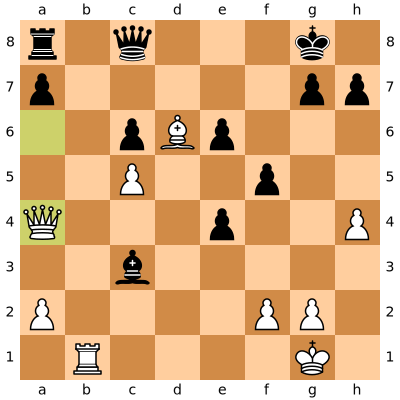

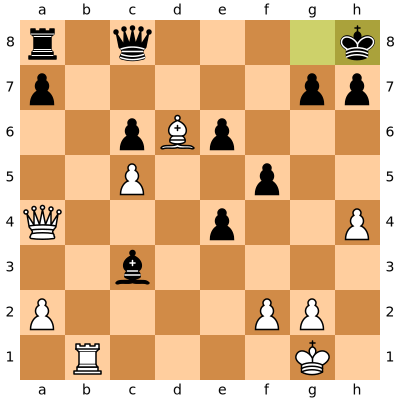

total simulations: 213 depth: 7
[{'visit_count': 28, 'mcts_score': 0.62742835814692033, 'total_score': 17.56799402811377, 'score': 0.0055998862, 'move': 'g2g3'}, {'visit_count': 27, 'mcts_score': 0.62430833252932849, 'total_score': 16.85632497829187, 'score': 0.024801534, 'move': 'h4h5'}, {'visit_count': 23, 'mcts_score': 0.61289071486099633, 'total_score': 14.096486441802915, 'score': 0.0097514754, 'move': 'g1h2'}]


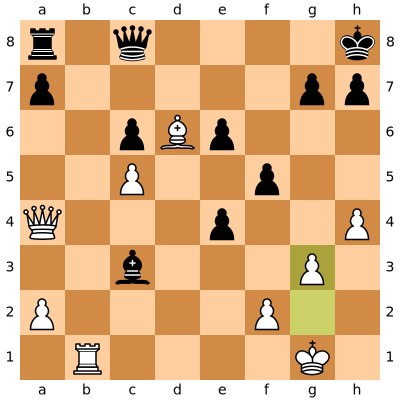

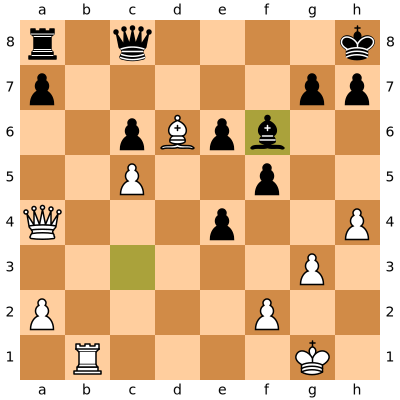

total simulations: 177 depth: 7
[{'visit_count': 18, 'mcts_score': 0.62836210550727256, 'total_score': 11.310517899130906, 'score': 0.033498872, 'move': 'h4h5'}, {'visit_count': 18, 'mcts_score': 0.6222078768459286, 'total_score': 11.199741783226715, 'score': 0.0035129373, 'move': 'g1h1'}, {'visit_count': 17, 'mcts_score': 0.62198409692771994, 'total_score': 10.573729647771239, 'score': 0.097359948, 'move': 'g1g2'}]


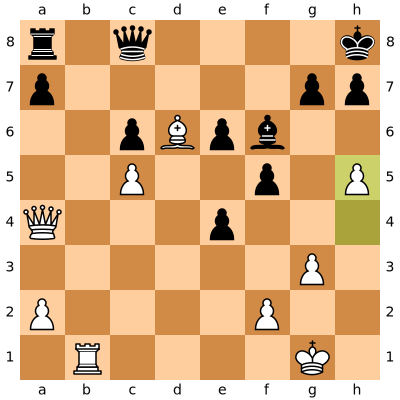

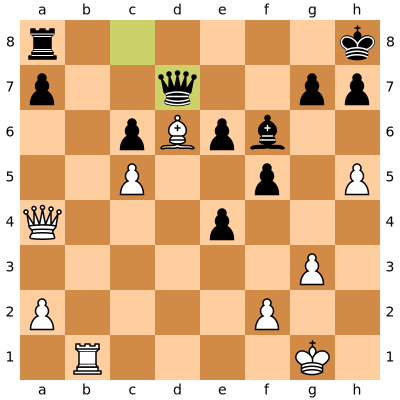

total simulations: 196 depth: 7
[{'visit_count': 32, 'mcts_score': 0.67933387841823156, 'total_score': 21.73868410938341, 'score': 0.26626009, 'move': 'a4a6'}, {'visit_count': 24, 'mcts_score': 0.66090188420977325, 'total_score': 15.861645221034559, 'score': 0.081285946, 'move': 'h5h6'}, {'visit_count': 21, 'mcts_score': 0.6428676232335182, 'total_score': 13.500220087903882, 'score': 0.038644135, 'move': 'g1g2'}]


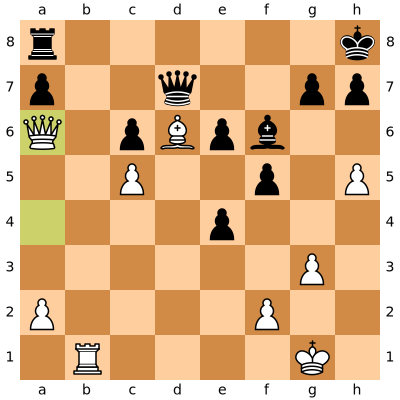

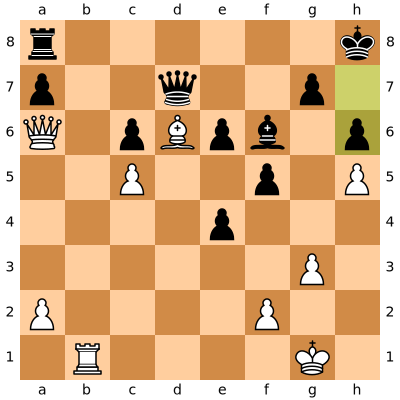

total simulations: 189 depth: 7
[{'visit_count': 13, 'mcts_score': 0.61452412243382182, 'total_score': 7.9888135916396843, 'score': 0.0023715962, 'move': 'g1f1'}, {'visit_count': 9, 'mcts_score': 0.58742825148574118, 'total_score': 5.2868542633716711, 'score': 0.0025090792, 'move': 'a2a3'}, {'visit_count': 44, 'mcts_score': 0.5727989417732583, 'total_score': 25.203153438023367, 'score': 0.0076107932, 'move': 'g1g2'}]


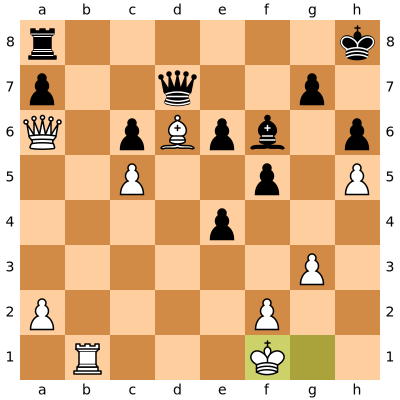

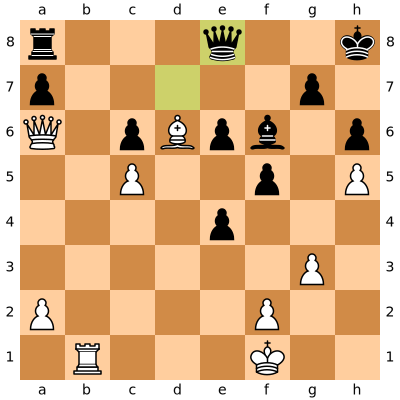

total simulations: 190 depth: 7
[{'visit_count': 31, 'mcts_score': 0.38218279331903182, 'total_score': 11.847666592889986, 'score': 0.015085391, 'move': 'f1g2'}, {'visit_count': 29, 'mcts_score': 0.37745343904206813, 'total_score': 10.946149732219975, 'score': 0.049987521, 'move': 'g3g4'}, {'visit_count': 28, 'mcts_score': 0.37266859120423407, 'total_score': 10.434720553718554, 'score': 0.0031075883, 'move': 'f1g1'}]


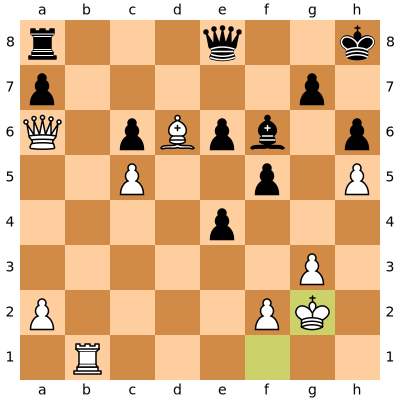

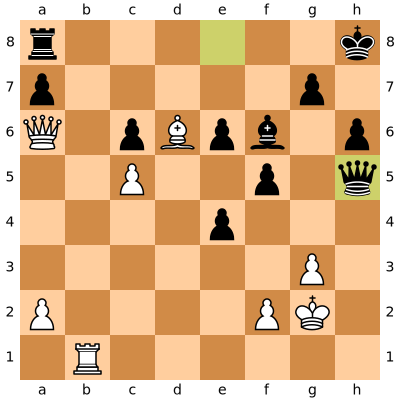

total simulations: 225 depth: 7
[{'visit_count': 67, 'mcts_score': 0.29717272120130145, 'total_score': 19.910572320487198, 'score': 0.014985833, 'move': 'b1b3'}, {'visit_count': 26, 'mcts_score': 0.24261131125026233, 'total_score': 6.307894092506821, 'score': 0.16947241, 'move': 'a6c6'}, {'visit_count': 15, 'mcts_score': 0.20307704900057574, 'total_score': 3.0461557350086363, 'score': 0.11212665, 'move': 'b1b7'}]


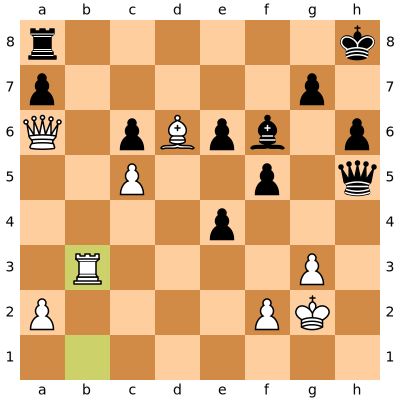

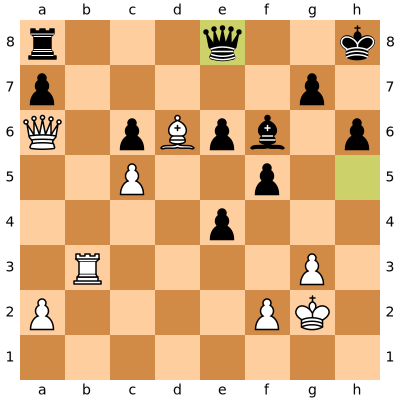

total simulations: 168 depth: 7
[{'visit_count': 21, 'mcts_score': 0.35325250743646108, 'total_score': 7.4183026561656824, 'score': 0.014116569, 'move': 'b3b1'}, {'visit_count': 19, 'mcts_score': 0.34558601004978962, 'total_score': 6.5661341909460029, 'score': 0.59974599, 'move': 'b3b7'}, {'visit_count': 17, 'mcts_score': 0.33426550133905736, 'total_score': 5.6825135227639754, 'score': 0.0034156267, 'move': 'b3b4'}]


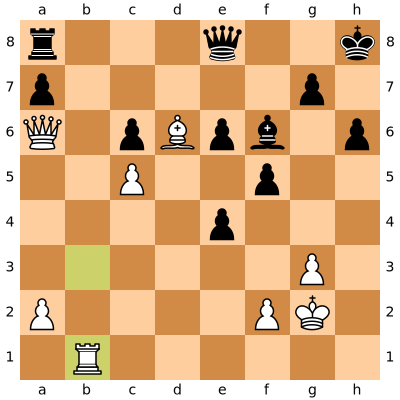

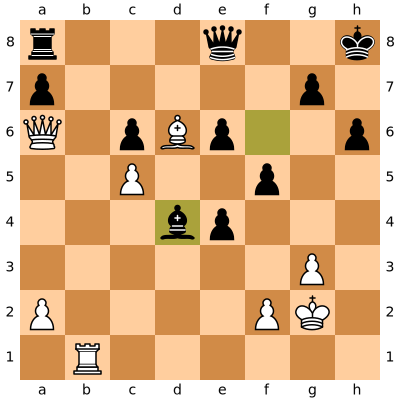

total simulations: 174 depth: 7
[{'visit_count': 37, 'mcts_score': 0.31239656730946563, 'total_score': 11.558672990450228, 'score': 0.7772547, 'move': 'b1b7'}, {'visit_count': 16, 'mcts_score': 0.24971188298353586, 'total_score': 3.9953901277365738, 'score': 0.0054009436, 'move': 'f2f4'}, {'visit_count': 14, 'mcts_score': 0.24371726182980874, 'total_score': 3.4120416656173225, 'score': 0.086198956, 'move': 'b1b4'}]


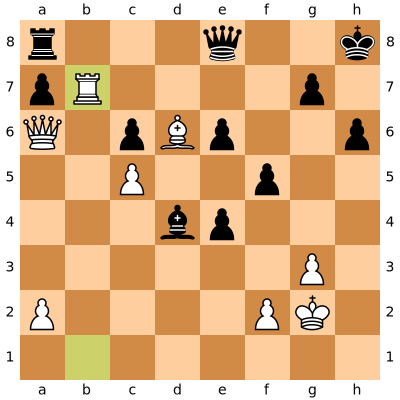

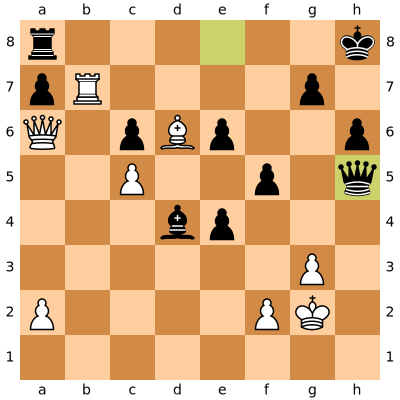

total simulations: 277 depth: 7
[{'visit_count': 59, 'mcts_score': 0.21204840512415732, 'total_score': 12.510855902325282, 'score': 0.0045225341, 'move': 'b7b3'}, {'visit_count': 15, 'mcts_score': 0.12078511509064255, 'total_score': 1.8117767263596383, 'score': 0.12686114, 'move': 'b7b8'}, {'visit_count': 9, 'mcts_score': 0.068593664589135461, 'total_score': 0.6173429813022191, 'score': 0.0027627614, 'move': 'g2g1'}]


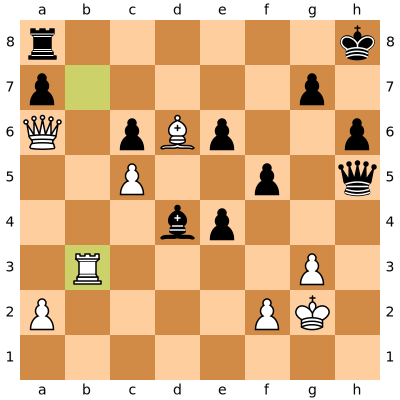

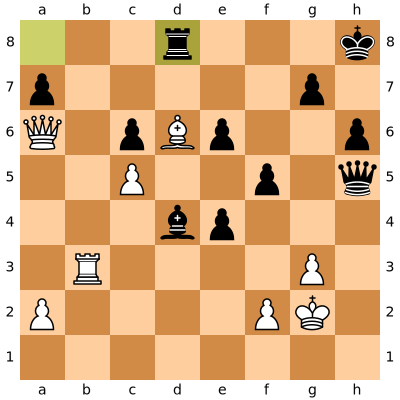

total simulations: 215 depth: 7
[{'visit_count': 24, 'mcts_score': 0.16900278771444388, 'total_score': 4.0560669051466531, 'score': 0.011230621, 'move': 'd6e7'}, {'visit_count': 18, 'mcts_score': 0.15248549761642038, 'total_score': 2.7447389570955671, 'score': 0.042151097, 'move': 'a6f1'}, {'visit_count': 16, 'mcts_score': 0.13801401361321397, 'total_score': 2.2082242178114235, 'score': 0.0053045955, 'move': 'a2a4'}]


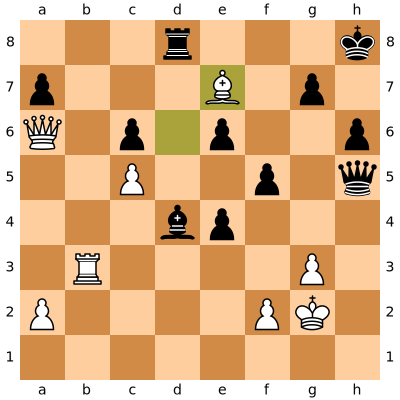

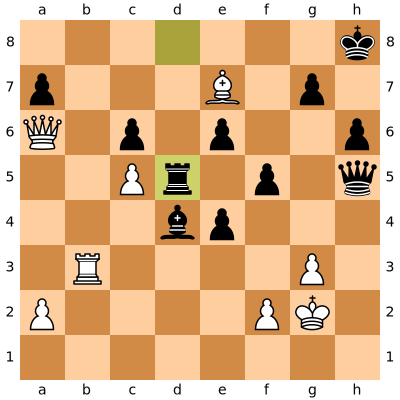

total simulations: 188 depth: 7
[{'visit_count': 23, 'mcts_score': 0.26006673250759704, 'total_score': 5.9815348476747321, 'score': 0.09307, 'move': 'e7d6'}, {'visit_count': 18, 'mcts_score': 0.23989636476971887, 'total_score': 4.3181345658549395, 'score': 0.0029925606, 'move': 'a2a4'}, {'visit_count': 14, 'mcts_score': 0.21814025345902421, 'total_score': 3.053963548426339, 'score': 0.0093759401, 'move': 'e7f8'}]


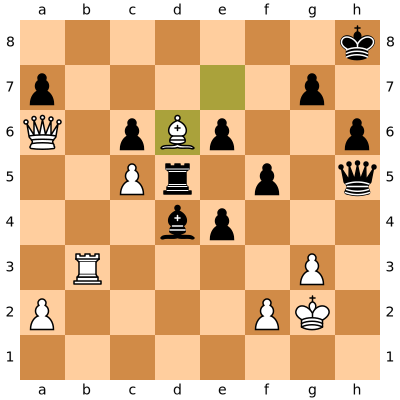

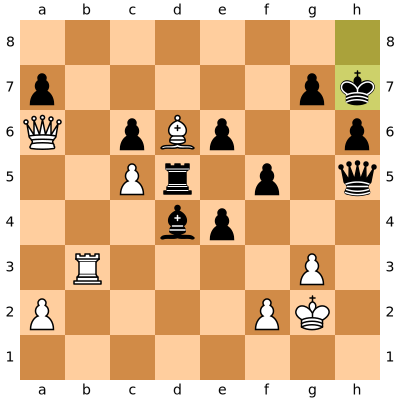

total simulations: 175 depth: 7
[{'visit_count': 14, 'mcts_score': 0.15448922959013739, 'total_score': 2.1628492142619233, 'score': 0.006921567, 'move': 'a2a4'}, {'visit_count': 13, 'mcts_score': 0.14744669270161112, 'total_score': 1.9168070051209445, 'score': 0.006771612, 'move': 'd6e7'}, {'visit_count': 14, 'mcts_score': 0.14336043184446692, 'total_score': 2.0070460458225368, 'score': 0.20695943, 'move': 'a6f1'}]


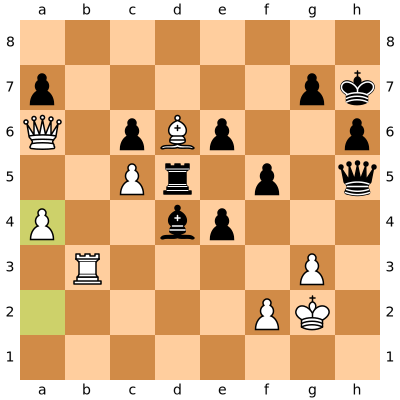

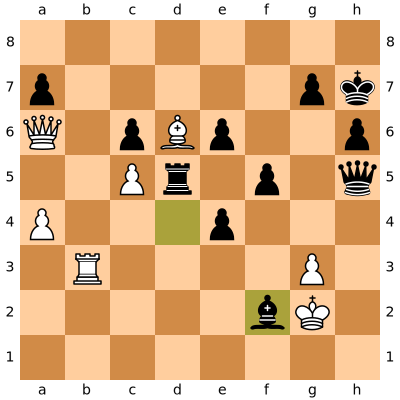

total simulations: 205 depth: 7
[{'visit_count': 13, 'mcts_score': 0.12429802715648591, 'total_score': 1.6158743530343169, 'score': 0.34447348, 'move': 'g2f2'}, {'visit_count': 12, 'mcts_score': 0.1112817491104397, 'total_score': 1.3353809893252764, 'score': 0.04234343, 'move': 'a6f1'}, {'visit_count': 12, 'mcts_score': 0.10963821536123448, 'total_score': 1.3156585843348139, 'score': 0.0050389078, 'move': 'a6c4'}]


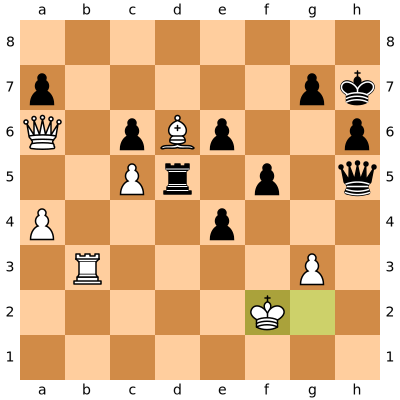

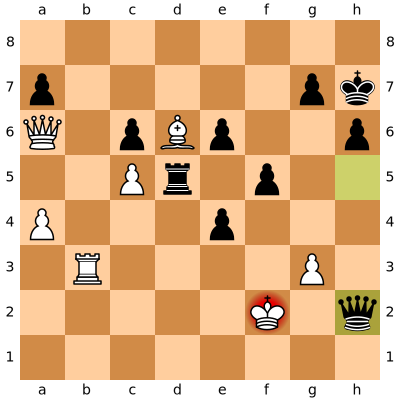

total simulations: 348 depth: 7
[{'visit_count': 269, 'mcts_score': 0.030426249105523464, 'total_score': 8.1846610093858114, 'score': 0.22728656, 'move': 'f2e1'}, {'visit_count': 45, 'mcts_score': -0.034271336621054221, 'total_score': -1.5422101479474399, 'score': 0.5360322, 'move': 'f2e3'}, {'visit_count': 34, 'mcts_score': -0.049890377290071494, 'total_score': -1.6962728278624308, 'score': 0.23668121, 'move': 'f2f1'}]


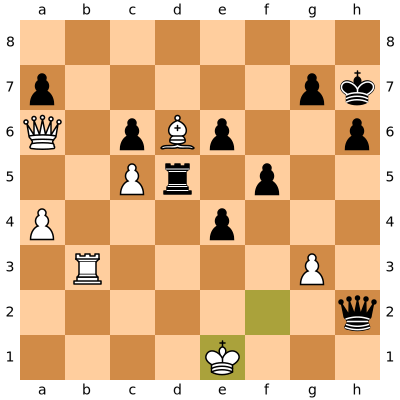

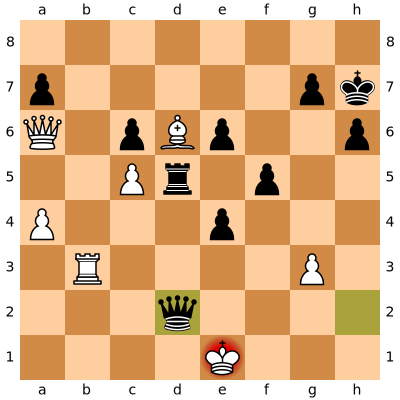

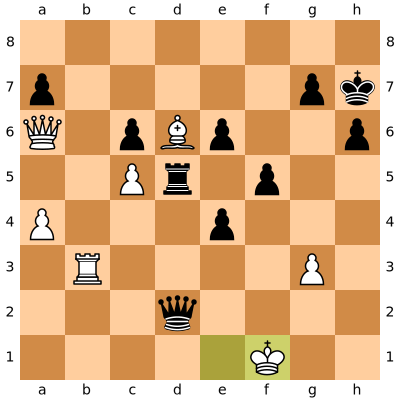

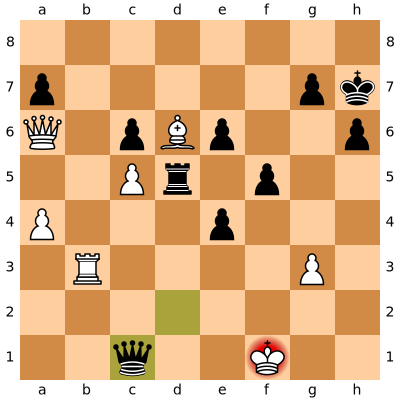

total simulations: 373 depth: 7
[{'visit_count': 180, 'mcts_score': 0.027543926076308119, 'total_score': 4.9579066937354614, 'score': 0.048595581, 'move': 'f1f2'}, {'visit_count': 101, 'mcts_score': 0.0088688495630854704, 'total_score': 0.89575380587163256, 'score': 0.61431187, 'move': 'f1g2'}, {'visit_count': 92, 'mcts_score': 0.0058214458759483891, 'total_score': 0.53557302058725176, 'score': 0.33709252, 'move': 'f1e2'}]


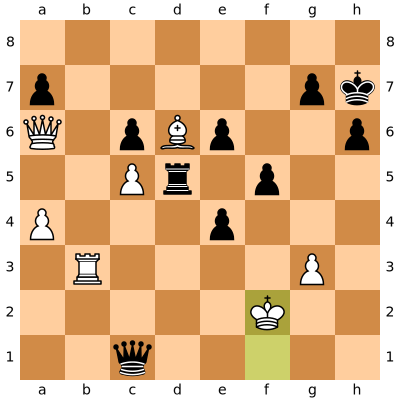

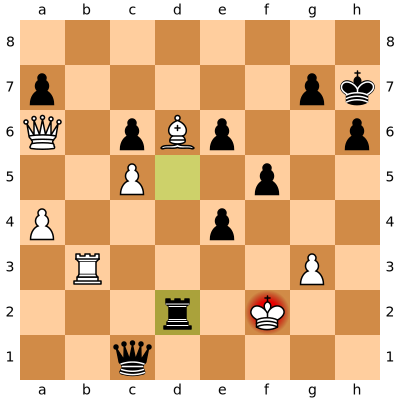

total simulations: 285 depth: 7
[{'visit_count': 218, 'mcts_score': 0.067468151467206694, 'total_score': 14.708057019851058, 'score': 0.77025795, 'move': 'f2e3'}, {'visit_count': 67, 'mcts_score': 0.028190981877402845, 'total_score': 1.8887957857859907, 'score': 0.22974205, 'move': 'a6e2'}]


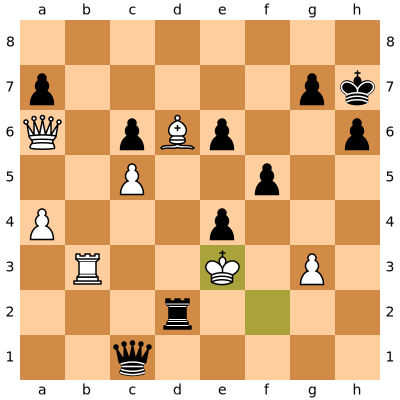

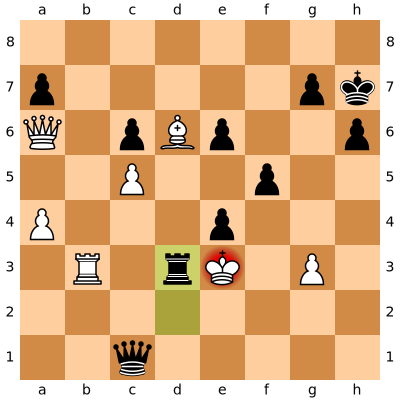

total simulations: 351 depth: 7
[{'visit_count': 243, 'mcts_score': 0.016061599989244668, 'total_score': 3.9029687973864542, 'score': 0.81097561, 'move': 'e3f2'}, {'visit_count': 108, 'mcts_score': -0.0071622127799013035, 'total_score': -0.77351898022934074, 'score': 0.1890244, 'move': 'e3e2'}]


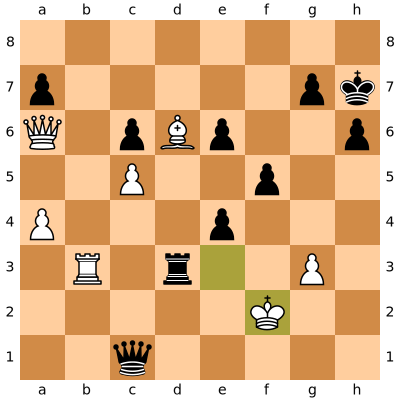

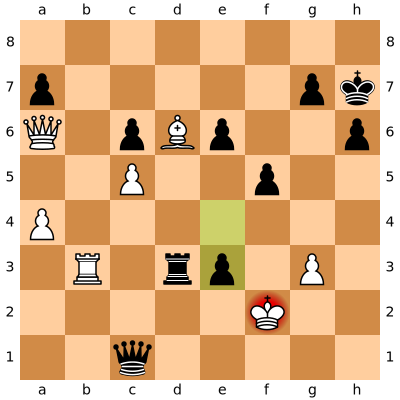

total simulations: 406 depth: 7
[{'visit_count': 263, 'mcts_score': 0.0012686018303346839, 'total_score': 0.33364228137802188, 'score': 0.1222165, 'move': 'f2g2'}, {'visit_count': 74, 'mcts_score': -0.038825597948793998, 'total_score': -2.873094248210756, 'score': 0.62544984, 'move': 'f2e2'}, {'visit_count': 69, 'mcts_score': -0.042135687156345206, 'total_score': -2.9073624137878191, 'score': 0.25233373, 'move': 'f2f3'}]


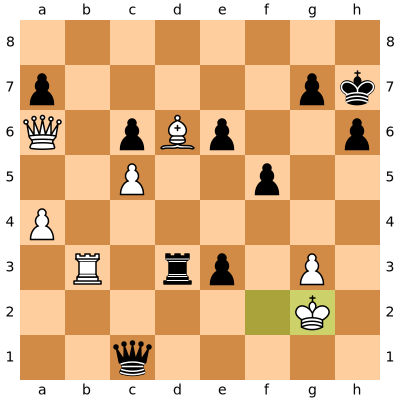

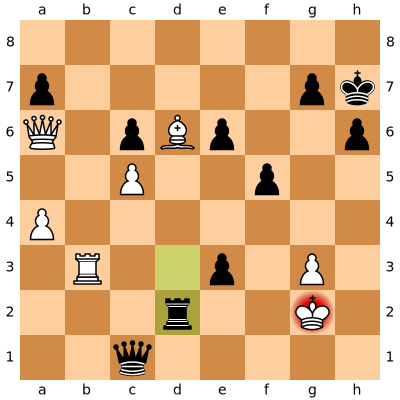

total simulations: 847 depth: 7
[{'visit_count': 504, 'mcts_score': -0.026126189958577965, 'total_score': -13.167599739123293, 'score': 0.0079865651, 'move': 'a6e2'}, {'visit_count': 175, 'mcts_score': -0.050377477232570494, 'total_score': -8.8160585156998366, 'score': 0.49853027, 'move': 'g2f3'}, {'visit_count': 168, 'mcts_score': -0.051579452938875545, 'total_score': -8.665348093731092, 'score': 0.49348313, 'move': 'g2h3'}]


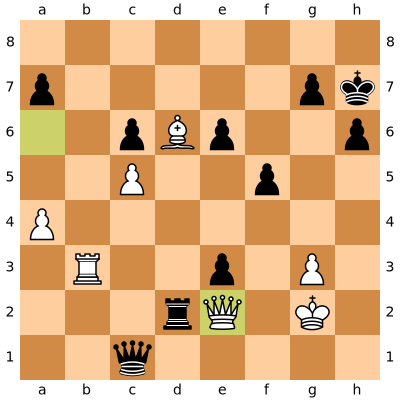

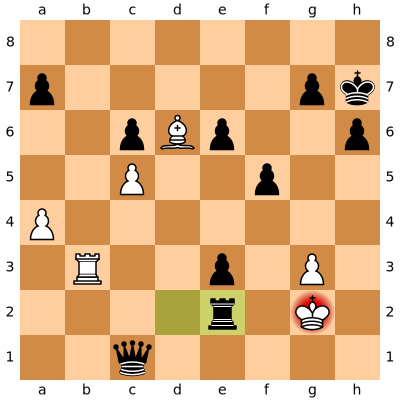

total simulations: 920 depth: 7
[{'visit_count': 463, 'mcts_score': -0.041221697899943024, 'total_score': -19.08564612767362, 'score': 0.65449673, 'move': 'g2f3'}, {'visit_count': 457, 'mcts_score': -0.041476562230870304, 'total_score': -18.954788939507729, 'score': 0.34550327, 'move': 'g2h3'}]


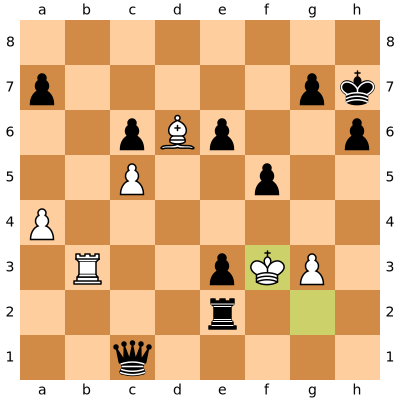

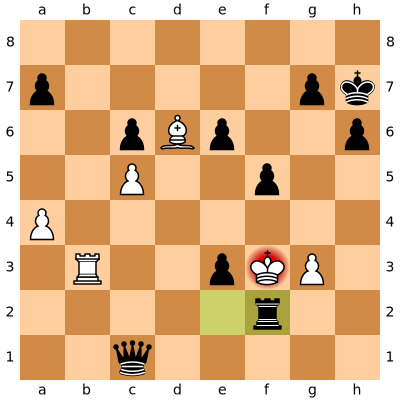

0-1 102


In [10]:
while not board.is_game_over():
    if board.turn == chess.WHITE:
        move = gruefish.best_move(board, depth=7, time_limit=20, debug=True, end_early_eval=101)
        board.push_uci(move['move'])
#         shitfish.setfenposition(board.fen())
#         board.push_uci(shitfish.bestmove()['move'])
#         clear_output()
        display(board)
    else:
#         move = gruefish.best_move(board, time_limit=20, debug=True, end_early_eval=21)
#         board.push_uci(move['move'])
        shitfish.setfenposition(board.fen())
        board.push_uci(shitfish.bestmove()['move'])
        display(board)
        
print(board.result(), len(board.move_stack))

In [78]:
board2= chess.Board(fen=board.fen())
board2.result()

'*'

In [4]:
temp_board = chess.Board()

In [4]:
temp_board.pop()
temp_board

NameError: name 'temp_board' is not defined

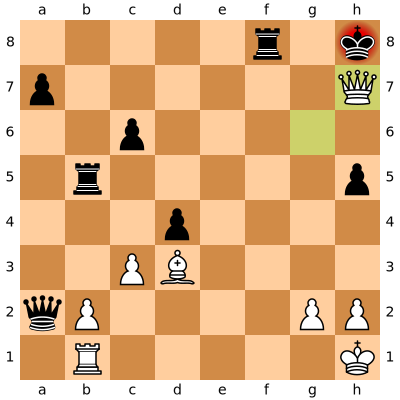

In [62]:
if len(board.move_stack) > len(temp_board.move_stack):
    temp_board.push(board.move_stack[len(temp_board.move_stack)])

temp_board

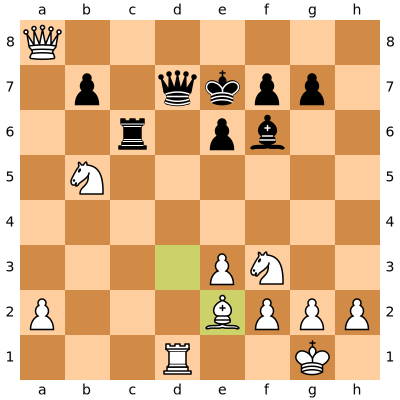

In [15]:
board.pop()
board

In [6]:
gruefish.init_explore = 0.5
gruefish.explore = 0.2

In [17]:
gruefish.clear_cache()
# board = chess.Board(fen=bad_decisions[0])
move = gruefish.best_move(board, depth=3, time_limit=20, debug=True)

total simulations: 775 depth: 3
[{'total_score': 6.1530705012210092, 'move': 'd7f7', 'mcts_score': 0.044912923366576707, 'score': 0.0034301705, 'visit_count': 137}, {'total_score': 1.2320997561954741, 'move': 'h5h6', 'mcts_score': 0.01785651820573151, 'score': 0.19312236, 'visit_count': 69}, {'total_score': 1.0574259106061512, 'move': 'd7d8', 'mcts_score': 0.016021604706153807, 'score': 0.086676612, 'visit_count': 66}]


In [18]:
board.push_uci('d7d2')

Move.from_uci('d7d2')

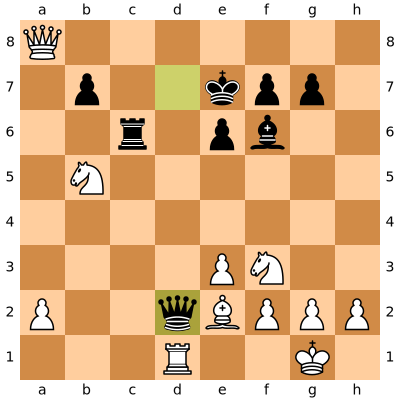

In [19]:
board

In [20]:
moves, score = gruefish.cache[board.fen()]
moves = sorted(moves, key=lambda x: x['mcts_score'], reverse=True)
print(score)
total_score = 0
total_simulations = 0

for move in moves:
    print(move)
    total_score += move['total_score']
    total_simulations += move['visit_count']
    
print(total_score, total_simulations, total_score/total_simulations)

0.840664
{'score': 0.15147108, 'total_score': 5.7922758467646451, 'visit_count': 6, 'mcts_score': 0.96537930779410752, 'move': 'f3d2'}
{'score': 0.57060665, 'total_score': 4.7785477902209905, 'visit_count': 5, 'mcts_score': 0.9557095580441981, 'move': 'd1d2'}
{'score': 0.23029783, 'total_score': 4.6397084717852213, 'visit_count': 5, 'mcts_score': 0.92794169435704421, 'move': 'a8b7'}
{'score': 0.00043170981, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a2a3'}
{'score': 4.2470176e-05, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a2a4'}
{'score': 0.0055722115, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a8a3'}
{'score': 0.0016806052, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a8a4'}
{'score': 2.2622327e-05, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a8a5'}
{'score': 9.9287572e-05, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a8a6'}
{'score': 0.0025667627, 'total_score': 0, 'visit_cou

In [31]:
stockfish.setfenposition(board.fen())
stockfish.bestmove()

{'info': {'depth': 20,
  'multipv': 1,
  'nodes': 23660942,
  'nps': 13315105,
  'pv': 'b2b6 e2e6 b6d8 d3g6 b7g7 g6h6 e8d6 g5f6 d4f6 e6f6 d6c4 f6g6 c8c7 g6g7 c7g7 h6e6 g7f7 c1c4 d8e7 e6e7 f7e7 a2c3 g8f7 c4c5 f7e8 f2f3 e7a7 c3b5 a7a1 g1f2 a1a2 f2g3',
  'score': {'eval': 'cp', 'value': -696},
  'seldepth': 39,
  'tbhits': 0,
  'time': 1777},
 'move': 'b2b6',
 'ponder': 'e2e6'}

In [32]:
board.fen()

'2r1n1k1/1r6/4pnp1/2pP2Bp/2Bb4/3Q3P/Nq2RPP1/2R3K1 b - - 1 37'

In [2]:
bad_decisions = [
    'r1b1k2r/2p1q1pp/1pnppn2/p2P1p2/2P5/P1BBPN2/1P3PPP/R2Q1RK1 b kq - 0 11',
    '1rb1k2r/1p2ppbp/3P1np1/p1n1N3/Pqp5/2N5/1PPQBPPP/R1B2RK1 b k - 0 14',
    '1K6/7P/8/8/8/4k3/8/8 w - - 7 171',
    '8/8/8/2k4K/P3P3/8/7P/8 w - - 0 30',
    'r1bqk2r/1p1p1ppp/2n1pb2/p1P5/QPP1n3/P3PN2/R4PPP/1NB1KB1R b Kkq - 2 9',
    '2r1n1k1/1r6/4pnp1/2pP2Bp/2Bb4/3Q3P/Nq2RPP1/2R3K1 b - - 1 37'
]